# Experiment Analysis

## Research Topic
Enhancing Collaboration in Overcooked: Improving AI-Agent Adaptability to Human Player Preferences

## Researcher
Yuechen Liu

## Supervisor
Dr Penny Kyburz

## Links to Contents
1. [Project Introduction](#Introduction)
2. [Research Paper](#Thesis)
3. [Code](#Code)
4. [Experiment Related Sources](#Links)
5. [Data Collection and Analysis](#Data)


# Introduction
The purpose of this research project is to enhance the
performance of the AI game players to collaborate better with human players according to their
preferences. In order to evaluate the performance of these AI players, a simulator of the
collaborative video game called Overcooked will be used. In the simulator, two players will work
collaboratively in a small kitchen to prepare food and to serve the customer as quick as
possible.
The current state-of-the-art techniques for training these AI game players gets them to play the
game simulator repetitively with themselves or other AI agents as teammates, and make
modifications to their decision to increase the score of each game play. Although the ultimate
goal is to create AI agents that cooperate with human players, human data are not used in the
training process since the collection is expensive. Because of this, although these agents can
achieve satisfactory performance in terms of scores and task achievements after training, they
struggle to collaborate with human players in a manner that aligns with the players' preferences.
This research project focuses on enhancing the collaborative capabilities of an AI agent within
the game "Overcooked." More specifically, the aim is to develop an agent that not only
understands the game's mechanics but also aligns its actions with the preferences of human
players. To achieve this, the decision-making stage of the trained model for generating the
action will be adjusted so that it tends to react in the way that the players prefer. The ultimate
goal is to create an AI teammate that can adapt to and resonate with the unique playing
preferences of its human teammates, fostering a more harmonious gameplay experience. 


# Thesis
The thesis can be viewed from this link [Thesis](./project_report.pdf).


# Code
The implementation of the adjustment is done by altering the weight of each action in the heuristics. This is located at [planners.py](PECAN/human_aware_rl/overcooked_ai/overcooked_ai_py/planning/planners.py). The current version kept in the code is when participants provided feedback saying *"I don't like the agent doing delivering task"*. Thus, the variable *num_pot_to_delivery* is slightly increased by 0.5, resulting in a slight raise for the cost of delivering the pot. In this case, if there are other options for the model that initially had similar or slightly higher cost, this adjustment may change the decision of the agent from doing the pot delivering task to the other available task. 

# Links

Consent forms are uploaded to ANU Onedrive. Here is the link: https://anu365-my.sharepoint.com/:f:/r/personal/u7227895_anu_edu_au/Documents/3770%20experiment%20data?csf=1&web=1&e=A2vpm9


# Data

In this experiment, we have collected the following data:
* Player Game Score With Original Model
* Player Game Score With Updated Model
* Player Preference (Converted to 0 and 1)
* Player Feedbacks (not included here for analysis)

Overall, 20 participants with past Overcooked experience were selected and conducted the experiment. Each player has played with both models in 5 different scenarios. The player preference is manually converted to numerical indications during the experiment for easier analysis. The player feedback is used to for model adjustment and evaluations. Notice that not all player feedbacks were used for the model adjustments and analysis purposes. Please refer to **Chapter 6: Discussion** in the [Research Paper](./project_report.pdf) for more details.


In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency


In [2]:
# Load the CSV files
original_scores = pd.read_csv('Original_Score.csv', index_col='Participants')
updated_scores = pd.read_csv('Update_Score.csv', index_col='Participants')


Scores tables are displayed below.

In [5]:
original_scores

,CrampedRoom,AsymmetricRoom,RingRoom,ForceCoordination,CounterCircuit
Participants,,,,,
1,200,260,140,160,140
2,220,280,140,160,140
3,200,300,160,180,140
4,220,320,160,180,160
5,180,320,180,160,140
6,260,300,160,160,160
7,260,280,140,200,180
8,280,260,160,220,160
9,300,300,180,220,140


In [6]:
updated_scores

,CrampedRoom,AsymmetricRoom,RingRoom,ForceCoordination,CounterCircuit
Participants,,,,,
1,220,220,160,180,160
2,240,260,160,140,160
3,220,280,120,200,180
4,240,280,140,200,140
5,180,280,160,140,120
6,280,260,180,140,180
7,280,260,160,180,140
8,280,280,180,240,180
9,300,320,120,240,120


Statistical measurements are computed below. Please refer to **Chapter 5.1 Player Scores Overview** for detailed analysis.

In [7]:
# Calculate the means for each table
mean_original = original_scores.mean().mean()
mean_updated = updated_scores.mean().mean()

# Calculate the standard deviations for each table
std_original = original_scores.values.flatten().std()
std_updated = updated_scores.values.flatten().std()

# Calculate the standard error of mean for each table
sem_original = std_original / (len(original_scores)**0.5)
sem_updated = std_updated / (len(updated_scores)**0.5)

# Calculate the standard error of difference
standard_error_difference = (sem_original**2 + sem_updated**2)**0.5

# Perform the t-test
t_statistic, p_val = ttest_ind(original_scores.values.flatten(), updated_scores.values.flatten(), equal_var=False)

# Calculate the degrees of freedom
degrees_freedom = len(original_scores.values.flatten()) + len(updated_scores.values.flatten()) - 2

# Print the results
print("Scores with the original model:")
print(f"Mean: {mean_original:.2f}")
print(f"Standard Deviation: {std_original:.2f}")
print(f"Standard Error of Mean: {sem_original:.2f}")
print("\nScores with the updated model:")
print(f"Mean: {mean_updated:.2f}")
print(f"Standard Deviation: {std_updated:.2f}")
print(f"Standard Error of Mean: {sem_updated:.2f}")
print("\nT-test Results:")
print(f"Standard Error of Difference: {standard_error_difference:.4f}")
print(f"Degrees of Freedom: {degrees_freedom}")
print(f"One-tailed P-value: {p_val/2:.4f}")  # divide by 2 for one-tailed
print(f"T-value: {t_statistic:.4f}")


Scores with the original model:
Mean: 201.20
Standard Deviation: 67.16
Standard Error of Mean: 15.02

Scores with the updated model:
Mean: 201.80
Standard Deviation: 63.69
Standard Error of Mean: 14.24

T-test Results:
Standard Error of Difference: 20.6970
Degrees of Freedom: 198
One-tailed P-value: 0.4743
T-value: -0.0645


A Box plot for the distribution of the scores obtained during collaborations with each model is produced below.

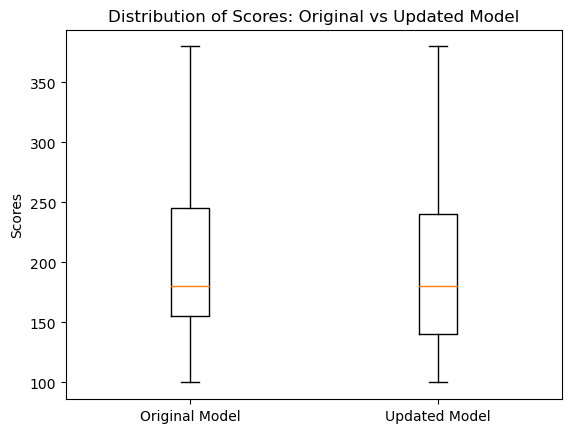

In [9]:
data_to_display = [original_scores.values.flatten(), updated_scores.values.flatten()]
model_labels = ['Original Model', 'Updated Model']

plt.boxplot(data_to_display, labels=model_labels)
plt.ylabel('Scores')
plt.title('Distribution of Scores: Original vs Updated Model')

# Display the plot
plt.show()

Player Preference proportion is computed and plotted below. Please refer to **Chapter 5.2 Player Preferences Overview** for detailed analysis.

In [15]:
player_preferences = pd.read_csv('Preference.csv', index_col='Participants')

# Descriptive Statistics
updated_model_counts = player_preferences.sum()
total_participants = len(player_preferences)
percentage_for_updated = (updated_model_counts / total_participants) * 100

print("Percentage of players who preferred the updated model in each room:")
print(percentage_for_updated)

global_preference_percentage = player_preferences.values.flatten().mean() * 100
print("\nOverall percentage of players who preferred the updated model:", global_preference_percentage)

preferences_for_original = 20 - updated_model_counts  # Assuming there are 20 participants and 1 indicates preference for updated model
preferences_for_updated = updated_model_counts


Percentage of players who preferred the updated model in each room:
CrampedRoom          65.0
AsymmetricRoom       30.0
RingRoom             60.0
ForceCoordination    60.0
CounterCircuit       45.0
dtype: float64

Overall percentage of players who preferred the updated model: 52.0


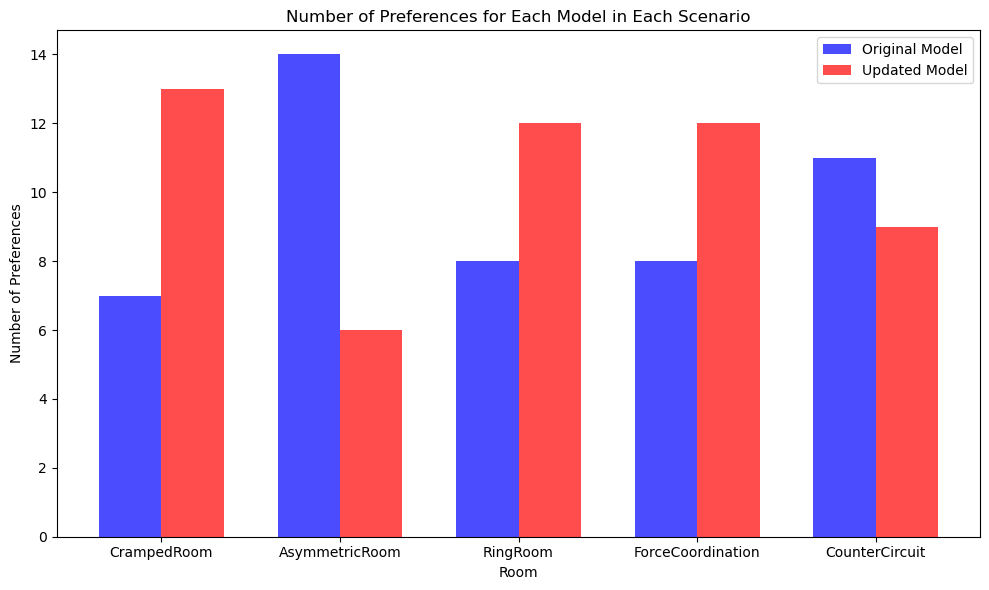

In [16]:
# Set up the bar chart
bar_width = 0.35
room_indices = np.arange(len(player_preferences.columns))
fig, ax = plt.subplots(figsize=(10, 6))

original_bars = ax.bar(room_indices, preferences_for_original, bar_width, label='Original Model', color='b', alpha=0.7)
updated_bars = ax.bar(room_indices + bar_width, preferences_for_updated, bar_width, label='Updated Model', color='r', alpha=0.7)

# Labeling, title and legend
ax.set_xlabel('Room')
ax.set_ylabel('Number of Preferences')
ax.set_title('Number of Preferences for Each Model in Each Scenario')
ax.set_xticks(room_indices + bar_width / 2)
ax.set_xticklabels(player_preferences.columns)
ax.legend()

# Display the bar chart
plt.tight_layout()
plt.show()


In [33]:
# Initialise for overall analysis
overall_prefer_original_higher_original = 0
overall_prefer_updated_higher_updated = 0
overall_prefer_original_higher_updated = 0
overall_prefer_updated_higher_original = 0

The following is the analysis for score and preference of the Cramped Room. Please refer to **5.3.1 Layout1: Cramped Room** for more detail.

Analysis for CrampedRoom:


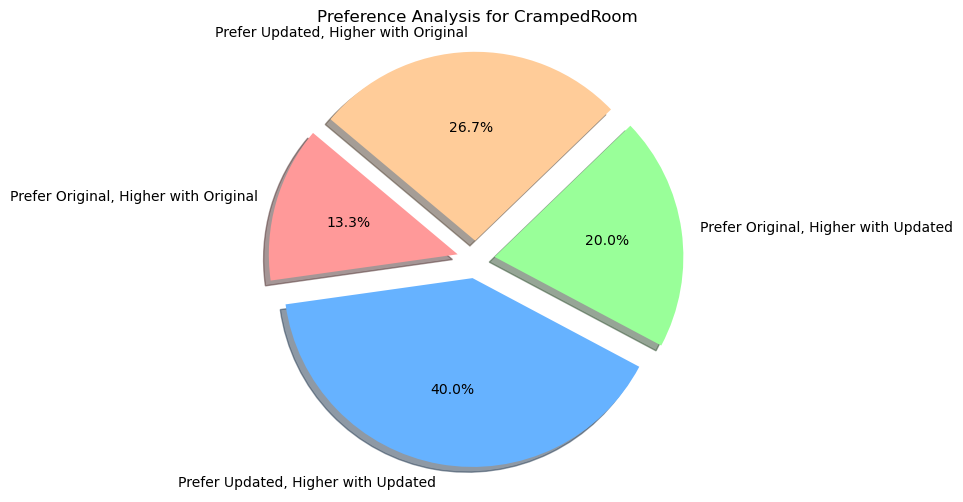


--------------------------------------------------

Prefer original and scored higher with original: 2
Prefer updated and scored higher with updated: 6
Prefer original and scored higher with updated: 3
Prefer updated and scored higher with original: 4
Chi-square value: 0.0000
P-value: 1.0000
No significant correlation between preference and higher score.

--------------------------------------------------



In [35]:
room = 'CrampedRoom'
print(f"Analysis for {room}:")

player_preferences = pd.read_csv('Preference.csv', index_col='Participants')

# Calculate player preferences and score comparisons
scores_higher_with_original = (original_scores[room] > updated_scores[room]).sum()
scores_higher_with_updated = (updated_scores[room] > original_scores[room]).sum()
equal_scores = (original_scores[room] == updated_scores[room]).sum()

original_model_preference = (player_preferences[room] == 0).sum()
updated_model_preference = (player_preferences[room] == 1).sum()

# Cross-comparison between preference and higher scores
original_pref_and_higher_score = ((player_preferences[room] == 0) & (original_scores[room] > updated_scores[room])).sum()
updated_pref_and_higher_score = ((player_preferences[room] == 1) & (updated_scores[room] > original_scores[room])).sum()
original_pref_but_higher_updated_score = ((player_preferences[room] == 0) & (updated_scores[room] > original_scores[room])).sum()
updated_pref_but_higher_original_score = ((player_preferences[room] == 1) & (original_scores[room] > updated_scores[room])).sum()

# Accumulate for the overall analysis
overall_prefer_original_higher_original += original_pref_and_higher_score
overall_prefer_updated_higher_updated += updated_pref_and_higher_score
overall_prefer_original_higher_updated += original_pref_but_higher_updated_score
overall_prefer_updated_higher_original += updated_pref_but_higher_original_score

# Pie chart components
labels = ['Prefer Original, Higher with Original', 'Prefer Updated, Higher with Updated', 
          'Prefer Original, Higher with Updated', 'Prefer Updated, Higher with Original']
sizes = [original_pref_and_higher_score, updated_pref_and_higher_score, 
         original_pref_but_higher_updated_score, updated_pref_but_higher_original_score]
colors = ['#ff9999','#66b2ff','#99ff99','#ffcc99']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice for emphasis

# Filter non-zero components
valid_indices = [i for i, size in enumerate(sizes) if size > 0]
labels = [labels[i] for i in valid_indices]
sizes = [sizes[i] for i in valid_indices]
colors = [colors[i] for i in valid_indices]
explode = tuple(explode[i] for i in valid_indices)

# Plotting pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title(f'Preference Analysis for {room}')
plt.show()

print("\n" + "-"*50 + "\n")

# Print results
print(f"Prefer original and scored higher with original: {original_pref_and_higher_score}")
print(f"Prefer updated and scored higher with updated: {updated_pref_and_higher_score}")
print(f"Prefer original and scored higher with updated: {original_pref_but_higher_updated_score}")
print(f"Prefer updated and scored higher with original: {updated_pref_but_higher_original_score}")

# Chi-square test
contingency_table = [
    [original_pref_and_higher_score, original_pref_but_higher_updated_score],
    [updated_pref_but_higher_original_score, updated_pref_and_higher_score]
]
chi2_value, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2_value:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There's a significant correlation between preference and higher score.")
else:
    print("No significant correlation between preference and higher score.")

print("\n" + "-"*50 + "\n")


The following is the analysis for score and preference of the Asymmetric Room. Please refer to **5.3.2 Layout2: Asymmetric Room** for more detail.

Analysis for AsymmetricRoom:


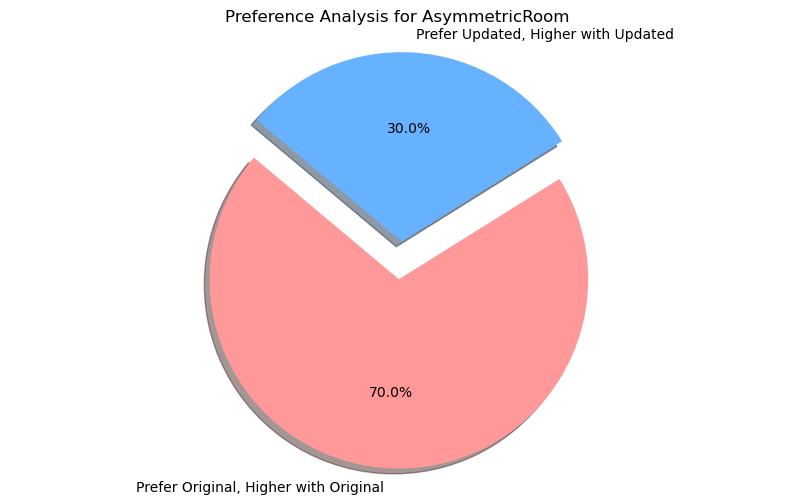


--------------------------------------------------

Prefer original and scored higher with original: 14
Prefer updated and scored higher with updated: 6
Prefer original and scored higher with updated: 0
Prefer updated and scored higher with original: 0
Chi-square value: 15.5215
P-value: 0.0001
There's a significant correlation between preference and higher score.

--------------------------------------------------



In [36]:
room = 'AsymmetricRoom'
print(f"Analysis for {room}:")


# Calculate player preferences and score comparisons
scores_higher_with_original = (original_scores[room] > updated_scores[room]).sum()
scores_higher_with_updated = (updated_scores[room] > original_scores[room]).sum()
equal_scores = (original_scores[room] == updated_scores[room]).sum()

original_model_preference = (player_preferences[room] == 0).sum()
updated_model_preference = (player_preferences[room] == 1).sum()

# Cross-comparison between preference and higher scores
original_pref_and_higher_score = ((player_preferences[room] == 0) & (original_scores[room] > updated_scores[room])).sum()
updated_pref_and_higher_score = ((player_preferences[room] == 1) & (updated_scores[room] > original_scores[room])).sum()
original_pref_but_higher_updated_score = ((player_preferences[room] == 0) & (updated_scores[room] > original_scores[room])).sum()
updated_pref_but_higher_original_score = ((player_preferences[room] == 1) & (original_scores[room] > updated_scores[room])).sum()

overall_prefer_original_higher_original += original_pref_and_higher_score
overall_prefer_updated_higher_updated += updated_pref_and_higher_score
overall_prefer_original_higher_updated += original_pref_but_higher_updated_score
overall_prefer_updated_higher_original += updated_pref_but_higher_original_score

# Pie chart components
labels = ['Prefer Original, Higher with Original', 'Prefer Updated, Higher with Updated', 
          'Prefer Original, Higher with Updated', 'Prefer Updated, Higher with Original']
sizes = [original_pref_and_higher_score, updated_pref_and_higher_score, 
         original_pref_but_higher_updated_score, updated_pref_but_higher_original_score]
colors = ['#ff9999','#66b2ff','#99ff99','#ffcc99']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice for emphasis

# Filter non-zero components
valid_indices = [i for i, size in enumerate(sizes) if size > 0]
labels = [labels[i] for i in valid_indices]
sizes = [sizes[i] for i in valid_indices]
colors = [colors[i] for i in valid_indices]
explode = tuple(explode[i] for i in valid_indices)

# Plotting pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title(f'Preference Analysis for {room}')
plt.show()

print("\n" + "-"*50 + "\n")

# Print results
print(f"Prefer original and scored higher with original: {original_pref_and_higher_score}")
print(f"Prefer updated and scored higher with updated: {updated_pref_and_higher_score}")
print(f"Prefer original and scored higher with updated: {original_pref_but_higher_updated_score}")
print(f"Prefer updated and scored higher with original: {updated_pref_but_higher_original_score}")

# Chi-square test
contingency_table = [
    [original_pref_and_higher_score, original_pref_but_higher_updated_score],
    [updated_pref_but_higher_original_score, updated_pref_and_higher_score]
]
chi2_value, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2_value:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There's a significant correlation between preference and higher score.")
else:
    print("No significant correlation between preference and higher score.")

print("\n" + "-"*50 + "\n")


The following is the analysis for score and preference of the Ring Room. Please refer to **5.3.3 Layout3: Ring Room** for more detail.

Analysis for RingRoom:


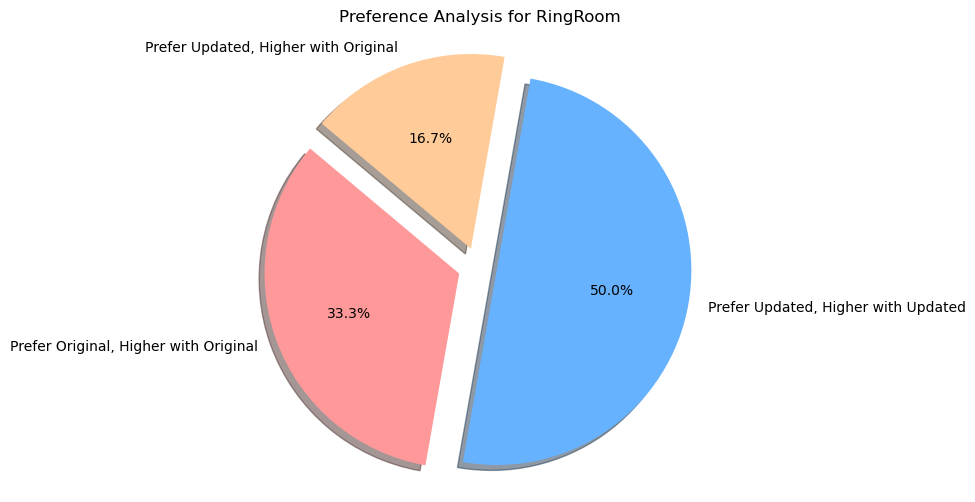


--------------------------------------------------

Prefer original and scored higher with original: 6
Prefer updated and scored higher with updated: 9
Prefer original and scored higher with updated: 0
Prefer updated and scored higher with original: 3
Chi-square value: 6.2500
P-value: 0.0124
There's a significant correlation between preference and higher score.

--------------------------------------------------



In [37]:
room = 'RingRoom'
print(f"Analysis for {room}:")


# Calculate player preferences and score comparisons
scores_higher_with_original = (original_scores[room] > updated_scores[room]).sum()
scores_higher_with_updated = (updated_scores[room] > original_scores[room]).sum()
equal_scores = (original_scores[room] == updated_scores[room]).sum()

original_model_preference = (player_preferences[room] == 0).sum()
updated_model_preference = (player_preferences[room] == 1).sum()

# Cross-comparison between preference and higher scores
original_pref_and_higher_score = ((player_preferences[room] == 0) & (original_scores[room] > updated_scores[room])).sum()
updated_pref_and_higher_score = ((player_preferences[room] == 1) & (updated_scores[room] > original_scores[room])).sum()
original_pref_but_higher_updated_score = ((player_preferences[room] == 0) & (updated_scores[room] > original_scores[room])).sum()
updated_pref_but_higher_original_score = ((player_preferences[room] == 1) & (original_scores[room] > updated_scores[room])).sum()

overall_prefer_original_higher_original += original_pref_and_higher_score
overall_prefer_updated_higher_updated += updated_pref_and_higher_score
overall_prefer_original_higher_updated += original_pref_but_higher_updated_score
overall_prefer_updated_higher_original += updated_pref_but_higher_original_score

# Pie chart components
labels = ['Prefer Original, Higher with Original', 'Prefer Updated, Higher with Updated', 
          'Prefer Original, Higher with Updated', 'Prefer Updated, Higher with Original']
sizes = [original_pref_and_higher_score, updated_pref_and_higher_score, 
         original_pref_but_higher_updated_score, updated_pref_but_higher_original_score]
colors = ['#ff9999','#66b2ff','#99ff99','#ffcc99']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice for emphasis

# Filter non-zero components
valid_indices = [i for i, size in enumerate(sizes) if size > 0]
labels = [labels[i] for i in valid_indices]
sizes = [sizes[i] for i in valid_indices]
colors = [colors[i] for i in valid_indices]
explode = tuple(explode[i] for i in valid_indices)

# Plotting pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title(f'Preference Analysis for {room}')
plt.show()

print("\n" + "-"*50 + "\n")

# Print results
print(f"Prefer original and scored higher with original: {original_pref_and_higher_score}")
print(f"Prefer updated and scored higher with updated: {updated_pref_and_higher_score}")
print(f"Prefer original and scored higher with updated: {original_pref_but_higher_updated_score}")
print(f"Prefer updated and scored higher with original: {updated_pref_but_higher_original_score}")

# Chi-square test
contingency_table = [
    [original_pref_and_higher_score, original_pref_but_higher_updated_score],
    [updated_pref_but_higher_original_score, updated_pref_and_higher_score]
]
chi2_value, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2_value:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There's a significant correlation between preference and higher score.")
else:
    print("No significant correlation between preference and higher score.")

print("\n" + "-"*50 + "\n")


The following is the analysis for score and preference of the Forced Coordination room. Please refer to **5.3.4 Layout4: Force Coordination** for more detail.

Analysis for ForceCoordination:


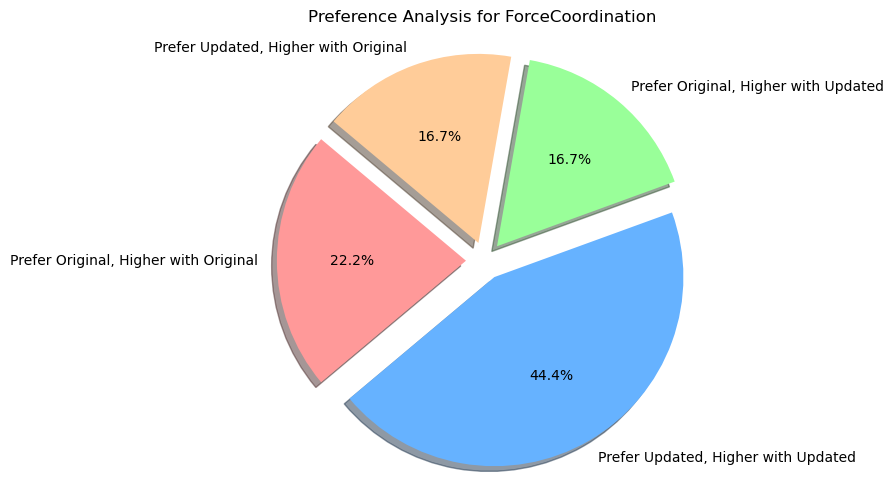


--------------------------------------------------

Prefer original and scored higher with original: 4
Prefer updated and scored higher with updated: 8
Prefer original and scored higher with updated: 3
Prefer updated and scored higher with original: 3
Chi-square value: 0.5950
P-value: 0.4405
No significant correlation between preference and higher score.

--------------------------------------------------



In [38]:
room = 'ForceCoordination'
print(f"Analysis for {room}:")


# Calculate player preferences and score comparisons
scores_higher_with_original = (original_scores[room] > updated_scores[room]).sum()
scores_higher_with_updated = (updated_scores[room] > original_scores[room]).sum()
equal_scores = (original_scores[room] == updated_scores[room]).sum()

original_model_preference = (player_preferences[room] == 0).sum()
updated_model_preference = (player_preferences[room] == 1).sum()

# Cross-comparison between preference and higher scores
original_pref_and_higher_score = ((player_preferences[room] == 0) & (original_scores[room] > updated_scores[room])).sum()
updated_pref_and_higher_score = ((player_preferences[room] == 1) & (updated_scores[room] > original_scores[room])).sum()
original_pref_but_higher_updated_score = ((player_preferences[room] == 0) & (updated_scores[room] > original_scores[room])).sum()
updated_pref_but_higher_original_score = ((player_preferences[room] == 1) & (original_scores[room] > updated_scores[room])).sum()

overall_prefer_original_higher_original += original_pref_and_higher_score
overall_prefer_updated_higher_updated += updated_pref_and_higher_score
overall_prefer_original_higher_updated += original_pref_but_higher_updated_score
overall_prefer_updated_higher_original += updated_pref_but_higher_original_score

# Pie chart components
labels = ['Prefer Original, Higher with Original', 'Prefer Updated, Higher with Updated', 
          'Prefer Original, Higher with Updated', 'Prefer Updated, Higher with Original']
sizes = [original_pref_and_higher_score, updated_pref_and_higher_score, 
         original_pref_but_higher_updated_score, updated_pref_but_higher_original_score]
colors = ['#ff9999','#66b2ff','#99ff99','#ffcc99']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice for emphasis

# Filter non-zero components
valid_indices = [i for i, size in enumerate(sizes) if size > 0]
labels = [labels[i] for i in valid_indices]
sizes = [sizes[i] for i in valid_indices]
colors = [colors[i] for i in valid_indices]
explode = tuple(explode[i] for i in valid_indices)

# Plotting pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title(f'Preference Analysis for {room}')
plt.show()

print("\n" + "-"*50 + "\n")

# Print results
print(f"Prefer original and scored higher with original: {original_pref_and_higher_score}")
print(f"Prefer updated and scored higher with updated: {updated_pref_and_higher_score}")
print(f"Prefer original and scored higher with updated: {original_pref_but_higher_updated_score}")
print(f"Prefer updated and scored higher with original: {updated_pref_but_higher_original_score}")

# Chi-square test
contingency_table = [
    [original_pref_and_higher_score, original_pref_but_higher_updated_score],
    [updated_pref_but_higher_original_score, updated_pref_and_higher_score]
]
chi2_value, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2_value:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There's a significant correlation between preference and higher score.")
else:
    print("No significant correlation between preference and higher score.")

print("\n" + "-"*50 + "\n")


The following is the analysis for score and preference of the Counter Circuit. Please refer to **5.3.5 Layout5: Counter Circuit** for more detail.

Analysis for CounterCircuit:


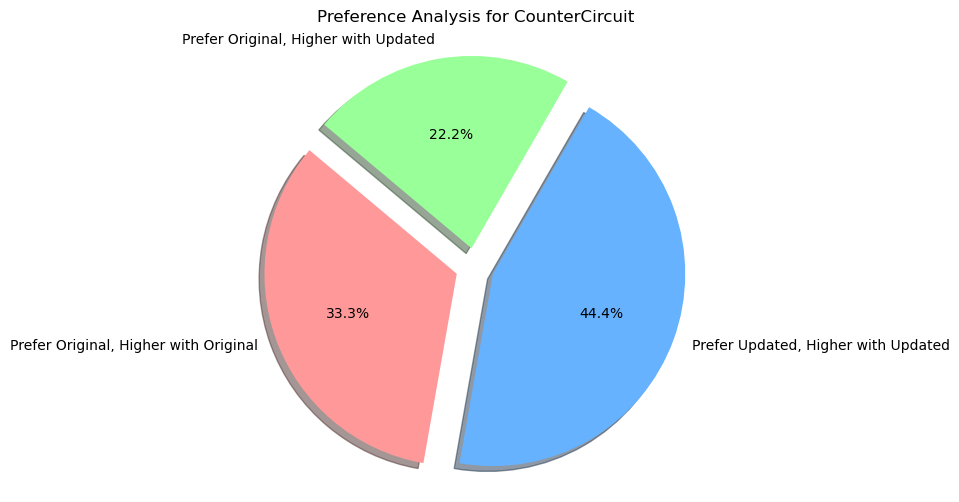


--------------------------------------------------

Prefer original and scored higher with original: 6
Prefer updated and scored higher with updated: 8
Prefer original and scored higher with updated: 4
Prefer updated and scored higher with original: 0
Chi-square value: 4.7531
P-value: 0.0292
There's a significant correlation between preference and higher score.

--------------------------------------------------



In [39]:
room = 'CounterCircuit'
print(f"Analysis for {room}:")


# Calculate player preferences and score comparisons
scores_higher_with_original = (original_scores[room] > updated_scores[room]).sum()
scores_higher_with_updated = (updated_scores[room] > original_scores[room]).sum()
equal_scores = (original_scores[room] == updated_scores[room]).sum()

original_model_preference = (player_preferences[room] == 0).sum()
updated_model_preference = (player_preferences[room] == 1).sum()

# Cross-comparison between preference and higher scores
original_pref_and_higher_score = ((player_preferences[room] == 0) & (original_scores[room] > updated_scores[room])).sum()
updated_pref_and_higher_score = ((player_preferences[room] == 1) & (updated_scores[room] > original_scores[room])).sum()
original_pref_but_higher_updated_score = ((player_preferences[room] == 0) & (updated_scores[room] > original_scores[room])).sum()
updated_pref_but_higher_original_score = ((player_preferences[room] == 1) & (original_scores[room] > updated_scores[room])).sum()

overall_prefer_original_higher_original += original_pref_and_higher_score
overall_prefer_updated_higher_updated += updated_pref_and_higher_score
overall_prefer_original_higher_updated += original_pref_but_higher_updated_score
overall_prefer_updated_higher_original += updated_pref_but_higher_original_score

# Pie chart components
labels = ['Prefer Original, Higher with Original', 'Prefer Updated, Higher with Updated', 
          'Prefer Original, Higher with Updated', 'Prefer Updated, Higher with Original']
sizes = [original_pref_and_higher_score, updated_pref_and_higher_score, 
         original_pref_but_higher_updated_score, updated_pref_but_higher_original_score]
colors = ['#ff9999','#66b2ff','#99ff99','#ffcc99']
explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice for emphasis

# Filter non-zero components
valid_indices = [i for i, size in enumerate(sizes) if size > 0]
labels = [labels[i] for i in valid_indices]
sizes = [sizes[i] for i in valid_indices]
colors = [colors[i] for i in valid_indices]
explode = tuple(explode[i] for i in valid_indices)

# Plotting pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title(f'Preference Analysis for {room}')
plt.show()

print("\n" + "-"*50 + "\n")

# Print results
print(f"Prefer original and scored higher with original: {original_pref_and_higher_score}")
print(f"Prefer updated and scored higher with updated: {updated_pref_and_higher_score}")
print(f"Prefer original and scored higher with updated: {original_pref_but_higher_updated_score}")
print(f"Prefer updated and scored higher with original: {updated_pref_but_higher_original_score}")

# Chi-square test
contingency_table = [
    [original_pref_and_higher_score, original_pref_but_higher_updated_score],
    [updated_pref_but_higher_original_score, updated_pref_and_higher_score]
]
chi2_value, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2_value:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("There's a significant correlation between preference and higher score.")
else:
    print("No significant correlation between preference and higher score.")

print("\n" + "-"*50 + "\n")


The following is the analysis for the overall score and preference. Please refer to **5.3 Score-Preference Correlation** for more detail.

Overall Chi-square value: 24.6800
Overall P-value: 0.0000
Overall, there's a significant correlation between preference and higher score.


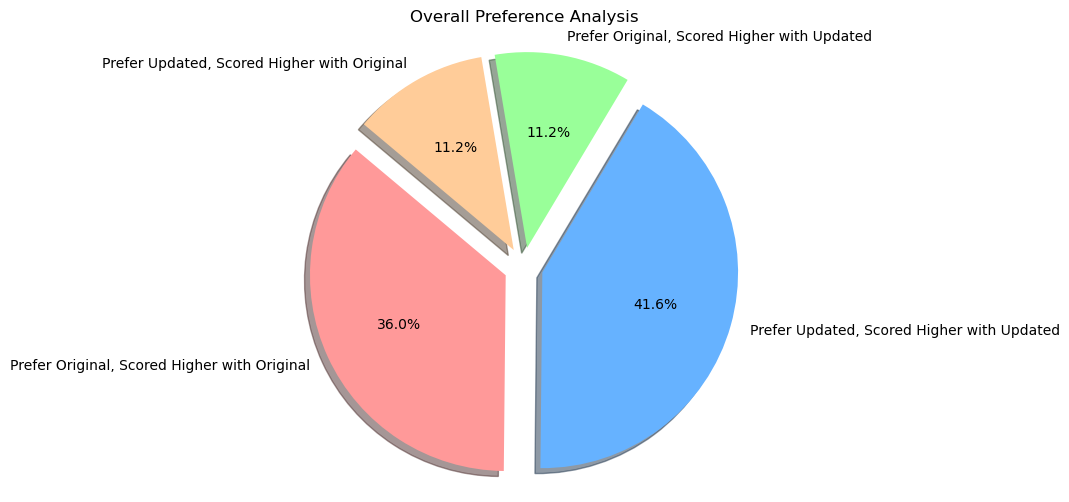

In [41]:
# Chi-square test for overall correlation between preference and score
overall_contingency_table = [
    [overall_prefer_original_higher_original, overall_prefer_original_higher_updated],
    [overall_prefer_updated_higher_original, overall_prefer_updated_higher_updated]
]
overall_chi2_value, overall_p_value, _, _ = chi2_contingency(overall_contingency_table)

print(f"Overall Chi-square value: {overall_chi2_value:.4f}")
print(f"Overall P-value: {overall_p_value:.4f}")
if overall_p_value < 0.05:
    print("Overall, there's a significant correlation between preference and higher score.")
else:
    print("Overall, there's no significant correlation between preference and higher score.")
    
# Pie chart components for overall preferences
overall_labels = ['Prefer Original, Scored Higher with Original', 'Prefer Updated, Scored Higher with Updated', 
                  'Prefer Original, Scored Higher with Updated', 'Prefer Updated, Scored Higher with Original']
overall_sizes = [overall_prefer_original_higher_original, overall_prefer_updated_higher_updated, 
                 overall_prefer_original_higher_updated, overall_prefer_updated_higher_original]
overall_colors = ['#ff9999','#66b2ff','#99ff99','#ffcc99']
explode_slices = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice for emphasis

# Filter non-zero components
valid_indices_overall = [i for i, size in enumerate(overall_sizes) if size > 0]
filtered_labels = [overall_labels[i] for i in valid_indices_overall]
filtered_sizes = [overall_sizes[i] for i in valid_indices_overall]
filtered_colors = [overall_colors[i] for i in valid_indices_overall]
filtered_explode = tuple(explode_slices[i] for i in valid_indices_overall)

# Plotting pie chart for overall preferences
plt.figure(figsize=(10, 6))
plt.pie(filtered_sizes, explode=filtered_explode, labels=filtered_labels, colors=filtered_colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Overall Preference Analysis')
plt.show()


This is all for my work. Thanks for your time and consistent support!

Kindest regard

Yuechen Liu